# Iris Flower Classification
Objective: Using the iris dataset, code and classifier using the Logistic Regression algorithm for the three types of flowers: Iris-Setosa, iris-versicolor and iris-virginica.

In [13]:
# Read data 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./Iris.csv')

## Analyzing the data

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


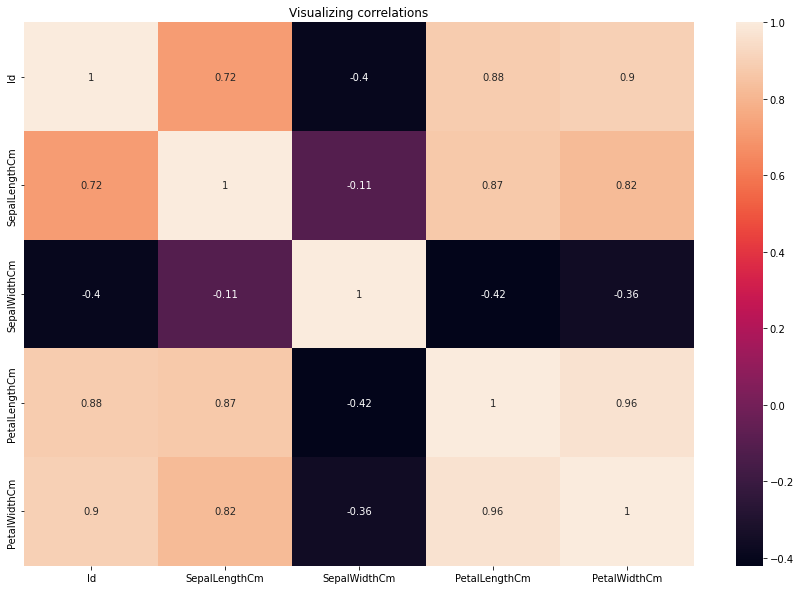

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.title('Visualizing correlations')
plt.show()

In [ ]:
#   

In [27]:
# Preprocessing data
# Before all, I will separate the target and the data
X, y = df.drop(['Species', 'Id'], axis=1), df.Species

In [74]:
# Because I will use the logistic regression model, it is necessary to normalize the data.
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

## Generate test and training set (30-70, 50-50 and 70-30).

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score 

In [59]:
"""Training the model with 70% of the data."""
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print(f'The score using 70% of the data for training is {log_reg.score(X_test, y_test) * 100}')

The score using 70% of the data for training is 100.0


In [56]:
"""Training the model with 70% of the data."""
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X, y, train_size=0.5)
log_reg_50 = LogisticRegression()
log_reg_50.fit(X_train_50, y_train_50)

print(f'The score using 70% of the data for training is {log_reg_50.score(X_test_50, y_test_50) * 100}')


The score using 70% of the data for training is 97.33333333333334


In [52]:
"""Training the model with 70% of the data."""
X_train_30, X_test_70, y_train_30, y_test_70 = train_test_split(X, y, train_size=0.3)
log_reg_30 = LogisticRegression()
log_reg_30.fit(X_train_30, y_train_30)

print(f'The score using 70% of the data for training is {log_reg_30.score(X_test_70, y_test_70) * 100}')


The score using 70% of the data for training is 95.23809523809523


As we can see, the model that was trained with the 70% of the data was the most accurate. So, in the following test, I will use the 70% of the data in the training phase.

## Try the classifier with only one of the variables.

In [86]:
keys = df.keys()
scores = []

for key in keys:
    #I will skip the index variable because is not relevant for the training model.
    if key not in  ('Id', 'Species'):
        #data preprocessing
        X = df[key]
        max = X.max()
        X /= max
        X = X.values.reshape(-1, 1)
        
        #Mix the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

        #Create the model
        log_reg_1 = LogisticRegression()
        
        #Train the model
        log_reg_1.fit(X_train, y_train)
        
        #Appending the results to our scores list
        scores.append((key, log_reg_1.score(X_test, y_test)))
        

In [87]:
for key, score in scores:
    print(f'Using only {key}: {score*100}')

Using only SepalLengthCm: 57.77777777777777
Using only SepalWidthCm: 53.333333333333336
Using only PetalLengthCm: 91.11111111111111
Using only PetalWidthCm: 86.66666666666667
